<a href="https://colab.research.google.com/github/G-Jayasri/Stock_Price_Prediction./blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - loss: 0.0231
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0018
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0016
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0015
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0018
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0015
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0014
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0013
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0012
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.0011
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0011
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 9.2315e-04
Epoch 13/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 8.5042e-04
Epoch 14/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 9.7198e-04
Epoch 15/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step

[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


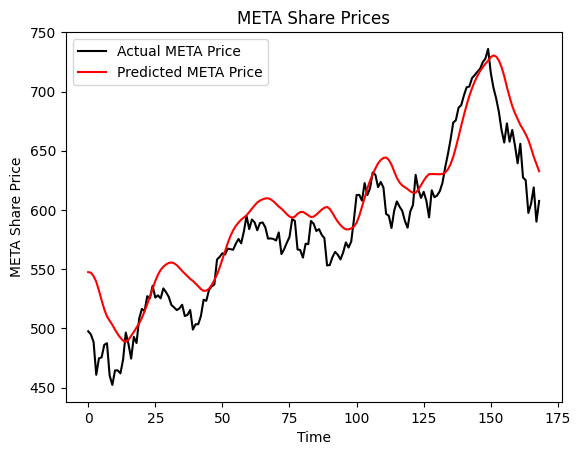

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# LOAD DATA
company = "META"  # Meta (formerly Facebook) ticker symbol

start = dt.datetime(2012, 1, 1)  # Jan 1, 2012
end = dt.datetime(2024, 7, 12)

# Fetch data from Yahoo Finance using yfinance
data = yf.download(company, start=start, end=end)

# PREPARE DATA
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Fixed reshape

# BUILD THE MODEL
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of the next closing value

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)

'''Test The Model Accuracy On The Test Data'''
# Load Test Data
test_start = dt.datetime(2024, 7, 12)
test_end = dt.datetime.now()

test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make Predictions On Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Fixed reshape

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Fixed typo

# Plot the Test Prediction
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="red", label=f"Predicted {company} Price")
plt.title(f"{company} Share Prices")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()
